# Importing Packages

In [157]:
import numpy as np
import pandas as pd
import nltk
from sklearn import metrics
from nltk.tag import pos_tag
from sklearn import preprocessing
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet, stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Mounting Google Drive

In [158]:
import sys                                                                  
from google.colab import files
sys.path.insert(0,'/content/drive/MyDrive/Assignment3')

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Creating CSV

In [165]:
# !cp /content/drive/MyDrive/Assignment3/PreProcessing.py /content 

In [166]:
# import PreProcessing

In [ ]:
# Obj = PreProcessing.Preprocessing()
# Obj.Create_CSV()

## Reading CSV

In [168]:
labels=["docID", "Title", "Content", "Preprocessed" , "Lemmatized" , "Type"]
raw_data = ""

def getTrainingDataset():
    return pd.read_csv('/content/drive/MyDrive/Assignment3/clean_data.csv', header=None, names=labels)  

raw_data = getTrainingDataset()

raw_data.head()

,docID,Title,Content,Preprocessed,Lemmatized,Type
0,0,http:^^www.cs.wisc.edu^~cs564-1^cs564.html,\n\nCS 564 - Database Management Systems: Desi...,cs database management systems design implemen...,c database management system design implementa...,Course
1,1,http:^^www.cs.washington.edu^education^courses...,\nCSE 413 (Winter 1996) Home Page\n\nCSE 413 ...,cse winter home page cse winter programming la...,cse winter home page cse winter programming la...,Course
2,2,http:^^www.cs.wisc.edu^~ferris^cs719.html,"\n\n CS 719, Spring 1996 \n\n\n\n\n CS 719: N...",cs spring cs network flows spring schedule lec...,c spring c network flow spring schedule lectur...,Course
3,3,http:^^www.cs.washington.edu^education^courses...,\n\nCSE 451 Home Page\n\n\n\nCSE 451\nIntroduc...,cse home page cse introduction operating syste...,cse home page cse introduction operating syste...,Course
4,4,http:^^www.cs.wisc.edu^~turnidge^cs302.html,"\n\nCS302, Section 19\n\n\nComputer Science 30...",cs section computer science section time mwf p...,c section computer science section time mwf pl...,Course


# Checking Null Values

In [169]:
def NullStatistics(df):
    missing_val = df.isnull().sum()
    print(missing_val)
    total_cells = np.product(df.shape)
    missing_percent = (missing_val.sum()/total_cells) *100
    print(f'\nThe missing data percent is: {missing_percent}')

NullStatistics(raw_data)

docID           0
Title           0
Content         0
Preprocessed    0
Lemmatized      0
Type            0
dtype: int64

The missing data percent is: 0.0


In [170]:
raw_data.shape

(1051, 6)

## **APPLYING FEATURE SELECTION TECHNIQUES**

## 1. TOPIC MODELLING

Creating Noun Dictionary

In [171]:
nounFrequency = defaultdict()

def createNounFrequency(sentence):
    token_words = word_tokenize(sentence)

    """Checking if the word is noun or not"""
    
    for word in token_words:
        ans = nltk.pos_tag(word)
        val = ans[0][1]
        if(val == 'NN' or val == 'NNS' or val == 'NNPS' or val == 'NNP'):
            if word in nounFrequency:
                count = nounFrequency[word]
                nounFrequency[word] = count + 1
            else:
                nounFrequency[word] = 1
   

In [172]:
raw_data["Lemmatized"].apply(lambda x: createNounFrequency(x))

0       None
1       None
2       None
3       None
4       None
        ... 
1046    None
1047    None
1048    None
1049    None
1050    None
Name: Lemmatized, Length: 1051, dtype: object

In [ ]:
"""Noun Selection"""

#Sorting by their frequencies
nounFrequency = sorted(nounFrequency.items(), key=lambda item: item[1])
nounFrequency = list(nounFrequency)

#Choosing the top 50 nouns based on frequency
topFiftyNouns = nounFrequency[-50:]
print(topFiftyNouns)

[('file', 305), ('conference', 308), ('proceeding', 310), ('phone', 313), ('texas', 314), ('object', 333), ('list', 334), ('exam', 338), ('computing', 339), ('r', 341), ('j', 342), ('distributed', 355), ('hour', 358), ('postscript', 360), ('design', 363), ('homework', 365), ('wisconsin', 365), ('b', 367), ('p', 392), ('cse', 397), ('link', 413), ('group', 417), ('problem', 417), ('work', 458), ('last', 462), ('wisc', 468), ('interest', 473), ('web', 521), ('e', 523), ('parallel', 523), ('lecture', 537), ('software', 556), ('engineering', 564), ('student', 570), ('time', 576), ('class', 601), ('language', 648), ('cornell', 652), ('program', 762), ('course', 776), ('programming', 830), ('department', 868), ('information', 923), ('project', 939), ('research', 1094), ('home', 1246), ('edu', 1331), ('system', 1731), ('computer', 2293), ('c', 3413)]


Creating Bi-grams

In [173]:
corpusBigrams = []

def createBigrams(sentence):
  token_words = word_tokenize(sentence)
  tempBigrams = list(nltk.bigrams(token_words))
  for i in tempBigrams:
    corpusBigrams.append(i)

In [174]:
for index , row in raw_data.iterrows():
    createBigrams(row['Lemmatized'])

In [175]:
print(corpusBigrams[2:10])

[('management', 'system'), ('system', 'design'), ('design', 'implementation'), ('implementation', 'c'), ('c', 'database'), ('database', 'management'), ('management', 'system'), ('system', 'design')]


In [176]:
FiftyNouns = []
for words in topFiftyNouns:
  FiftyNouns.append(words[0])

In [177]:
"""Forming Co-Occurance"""

#If the noun exists in bigram then shortlist it

co_occurance_features = []

for words in corpusBigrams:
  if words[0] in FiftyNouns or words[1] in FiftyNouns:
    if words[0] not in co_occurance_features:
      co_occurance_features.append(words[0])
    if words[1] not in co_occurance_features:
      co_occurance_features.append(words[1])

In [178]:
print(co_occurance_features)

['c', 'database', 'management', 'system', 'design', 'implementation', 'course', 'information', 'postscript', 'version', 'new', 'class', 'friday', 'office', 'hour', 'time', 'assignment', 'text', 'last', 'updated', 'handout', 'mailing', 'list', 'solution', 'exercise', 'first', 'day', 'overview', 'topic', 'minibase', 'home', 'page', 'html', 'year', 'sample', 'key', 'midterm', 'using', 'sybase', 'info', 'www', 'resource', 'tutorial', 'tree', 'language', 'construction', 'graded', 'experience', 'phone', 'e', 'mail', 'raghu', 'mw', 'pm', 'lecture', 'discussion', 'mwf', 'xbao', 'thur', 'modified', 'cse', 'winter', 'programming', 'tanimoto', 'department', 'computer', 'science', 'engineering', 'university', 'sln', 'schedule', 'tuesday', 'monday', 'sieg', 'archive', 'past', 'also', 'grading', 'homework', 'exam', 'final', 'project', 'participation', 'reading', 'online', 'throughout', 'including', 'logic', 'prolog', 'parsing', 'understanding', 'shell', 'expert', 'either', 'introduction', 'common', 

## 2. Lexical Chain

Finding Nouns

In [179]:
Nouns = []

def shortList_Nouns(sentence):
  token_words = word_tokenize(sentence)
  for word in token_words:
      tagged = nltk.pos_tag(word)
      n_type = tagged[0][1]
      if(n_type == 'NN' or n_type == 'NNS' or n_type == 'NNPS' or n_type == 'NNP'):
        if word not in Nouns:
          Nouns.append(word)

In [180]:
for index , row in raw_data.iterrows():
  shortList_Nouns(row["Lemmatized"])

In [181]:
print(Nouns)

['c', 'system', 'design', 'course', 'information', 'postscript', 'version', 'class', 'instead', 'hour', 'time', 'due', 'changed', 'text', 'last', 'list', 'solution', 'chapter', 'exercise', 'please', 'dont', 'print', 'first', 'prerequisite', 'topic', 'covered', 'grading', 'policy', 'issue', 'minibase', 'home', 'check', 'detail', 'html', 'sep', 'year', 'midterm', 'key', 'sybase', 'info', 'help', 'entry', 'www', 'resource', 'tutorial', 'gcc', 'g', 'tree', 'gdb', 'debugger', 'language', 'construction', 'graded', 'experience', 'coding', 'convention', 'instructor', 'phone', 'e', 'mw', 'pm', 'lecture', 'discussion', 'mwf', 'place', 'ingraham', 'teaching', 'xbao', 'tues', 'thur', 'modified', 'mon', 'sept', 'cse', 'winter', 'programming', 'steve', 'department', 'computer', 'engineering', 'seattle', 'wa', 'ta', 'ruth', 'meeting', 'tuesday', 'thursday', 'sieg', 'except', 'jan', 'meet', 'thompson', 'room', 'sln', 'monday', 'wednesday', 'tentative', 'examination', 'transparency', 'posted', 'credit'

Creating Relations

In [182]:
def create_relation_list():

    relation_list = defaultdict(list)
    
    for k in Nouns:   
        relation = []
        for syn in wordnet.synsets(k, pos = wordnet.NOUN):
            for l in syn.lemmas():
                relation.append(l.name())
                if l.antonyms():
                    relation.append(l.antonyms()[0].name())
            for l in syn.hyponyms():
                if l.hyponyms():
                    relation.append(l.hyponyms()[0].name().split('.')[0])
            for l in syn.hypernyms():
                if l.hypernyms():
                    relation.append(l.hypernyms()[0].name().split('.')[0])
        relation_list[k].append(relation)
    return relation_list

In [183]:
nltk.download('wordnet')
relation_list = create_relation_list() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [184]:
print(relation_list)

defaultdict(<class 'list'>, {'c': [['degree_centigrade', 'degree_Celsius', 'C', 'stp', 'temperature_unit', 'speed_of_light', 'light_speed', 'c', 'number', 'rate', 'vitamin_C', 'C', 'ascorbic_acid', 'inhibitor', 'vitamin', 'deoxycytidine_monophosphate', 'C', 'ester', 'cytosine', 'C', 'base', 'carbon', 'C', 'atomic_number_6', 'bone_black', 'carbonado', 'buckminsterfullerene', 'lead', 'substance', 'hundred', '100', 'C', 'century', 'one_C', 'integer', 'coulomb', 'C', 'ampere-second', 'electromagnetic_unit', 'C', 'artificial_language', 'C', 'note', 'C', 'c', 'character', 'coke', 'blow', 'nose_candy', 'snow', 'C', 'hard_drug']], 'system': [['system', 'recording_system', 'ground_control', 'backup_system', 'closed_loop', 'joint_direct_attack_munition', 'fuel_injection', 'global_positioning_system', 'reseau', 'computer_network', 'firewall', 'anti-submarine_rocket', 'artifact', 'system', 'scheme', 'industrialism', 'federal_judiciary', 'accentual_system', 'espionage_network', 'class_structure', '

Creating Lexical Chains

In [ ]:
def create_lexical_chain():
    lexical = []
    threshold = 0.5
    for noun in Nouns:
        flag = 0
        for j in range(len(lexical)):
            if flag == 0:
                for key in list(lexical[j]):
                    if key == noun and flag == 0:
                        lexical[j][noun] +=1
                        flag = 1
                    elif key in relation_list[noun][0] and flag == 0:
                        syns1 = wordnet.synsets(key, pos = wordnet.NOUN)
                        syns2 = wordnet.synsets(noun, pos = wordnet.NOUN)
                        if syns1[0].wup_similarity(syns2[0]) >= threshold:
                            lexical[j][noun] = 1
                            flag = 1
                    elif noun in relation_list[key][0] and flag == 0:
                        syns1 = wordnet.synsets(key, pos = wordnet.NOUN)
                        syns2 = wordnet.synsets(noun, pos = wordnet.NOUN)
                        if syns1[0].wup_similarity(syns2[0]) >= threshold:
                            lexical[j][noun] = 1
                            flag = 1
        if flag == 0: 
            dic_nuevo = {}
            dic_nuevo[noun] = 1
            lexical.append(dic_nuevo)
            flag = 1
    return lexical

In [ ]:
lexical_chain = create_lexical_chain()

In [ ]:
print(lexical_chain)

[{'c': 1, 'integer': 1, 'xv': 1, 'grand': 1, 'six': 1, 'nine': 1, 'hundred': 1, 'eight': 1, 'xx': 1, 'ten': 1, 'decade': 1, 'century': 1, 'meg': 1, 'xi': 1, 'million': 1, 'thousand': 1, 'twenty': 1, 'eleven': 1, 'xii': 1, 'fin': 1, 'dozen': 1, 'triplet': 1, 'gross': 1, 'twelve': 1, 'trio': 1, 'eighteen': 1, 'thirty': 1, 'sixty': 1, 'seventeen': 1, 'myriad': 1, 'fifteen': 1, 'lx': 1}, {'system': 1, 'platform': 1, 'surface': 1, 'vocabulary': 1, 'body': 1, 'chamber': 1, 'wireless': 1, 'crypt': 1, 'region': 1, 'zone': 1, 'forge': 1, 'bench': 1, 'empire': 1, 'servo': 1, 'superhighway': 1, 'gps': 1, 'playground': 1, 'territory': 1, 'intercom': 1, 'terrace': 1, 'ion': 1, 'pike': 1}, {'design': 1, 'designing': 1, 'creation': 1, 'movie': 1, 'boring': 1, 'yield': 1, 'film': 1, 'cutting': 1, 'digging': 1, 'pic': 1, 'programing': 1, 'cinema': 1, 'western': 1, 'decrease': 1, 'toon': 1, 'sewing': 1}, {'course': 1}, {'information': 1, 'list': 1, 'info': 1, 'listing': 1, 'group': 1, 'public': 1, 'lost

Pruning

In [ ]:
def prune():
    pruned_Lexical_Chain = []
    while lexical_chain:
        result = lexical_chain.pop()
        if len(result.keys()) == 1:
            for value in result.values():
                if value != 1: 
                    pruned_Lexical_Chain.append(result)
        else:
            pruned_Lexical_Chain.append(result)
    return pruned_Lexical_Chain

In [ ]:
pruned_Lexical_Chain = prune()

In [ ]:
print(pruned_Lexical_Chain)

[{'porn': 1, 'erotica': 1}, {'habit': 1, 'wont': 1}, {'bias': 1, 'prejudice': 1}, {'counseling': 1, 'guidance': 1}, {'protein': 1, 'molecule': 1}, {'realtor': 1, 'broker': 1}, {'vine': 1, 'pepper': 1}, {'sparseness': 1, 'sparsity': 1}, {'cod': 1, 'pod': 1}, {'tilt': 1, 'controversy': 1}, {'leisure': 1, 'honeymoon': 1}, {'lb': 1, 'pound': 1}, {'croft': 1, 'workplace': 1}, {'devil': 1, 'demon': 1}, {'sunrise': 1, 'sunset': 1}, {'poop': 1, 'dirt': 1}, {'brent': 1, 'brant': 1}, {'benny': 1, 'sesame': 1}, {'fear': 1, 'shyness': 1, 'suspense': 1}, {'goody': 1, 'treat': 1}, {'grudge': 1, 'grievance': 1}, {'cinematography': 1, 'filming': 1}, {'dream': 1, 'creativity': 1}, {'convict': 1, 'inmate': 1}, {'fizzle': 1, 'bust': 1}, {'cull': 1, 'reject': 1}, {'portuguese': 1, 'latin': 1}, {'flame': 1, 'flaming': 1}, {'fore': 1, 'bow': 1}, {'supervision': 1, 'supervising': 1}, {'redundancy': 1, 'verbosity': 1}, {'maze': 1, 'labyrinth': 1}, {'glade': 1, 'clearing': 1}, {'gilbert': 1, 'gi': 1}, {'bean':

## **COMBINING FEATURES**

In [185]:
X_Features = []

for feature in co_occurance_features:
  if feature not in X_Features:
    X_Features.append(feature)

for i in range(len(pruned_Lexical_Chain)):
  features = pruned_Lexical_Chain[i].keys() 
  for feature in features:
      if feature not in X_Features:
          X_Features.append(feature)

In [186]:
print(X_Features)

['c', 'database', 'management', 'system', 'design', 'implementation', 'course', 'information', 'postscript', 'version', 'new', 'class', 'friday', 'office', 'hour', 'time', 'assignment', 'text', 'last', 'updated', 'handout', 'mailing', 'list', 'solution', 'exercise', 'first', 'day', 'overview', 'topic', 'minibase', 'home', 'page', 'html', 'year', 'sample', 'key', 'midterm', 'using', 'sybase', 'info', 'www', 'resource', 'tutorial', 'tree', 'language', 'construction', 'graded', 'experience', 'phone', 'e', 'mail', 'raghu', 'mw', 'pm', 'lecture', 'discussion', 'mwf', 'xbao', 'thur', 'modified', 'cse', 'winter', 'programming', 'tanimoto', 'department', 'computer', 'science', 'engineering', 'university', 'sln', 'schedule', 'tuesday', 'monday', 'sieg', 'archive', 'past', 'also', 'grading', 'homework', 'exam', 'final', 'project', 'participation', 'reading', 'online', 'throughout', 'including', 'logic', 'prolog', 'parsing', 'understanding', 'shell', 'expert', 'either', 'introduction', 'common', 

## 3. TF-IDF

In [187]:
Y = raw_data["Type"]
X = raw_data["Lemmatized"]

In [188]:
print(X_Features)

['c', 'database', 'management', 'system', 'design', 'implementation', 'course', 'information', 'postscript', 'version', 'new', 'class', 'friday', 'office', 'hour', 'time', 'assignment', 'text', 'last', 'updated', 'handout', 'mailing', 'list', 'solution', 'exercise', 'first', 'day', 'overview', 'topic', 'minibase', 'home', 'page', 'html', 'year', 'sample', 'key', 'midterm', 'using', 'sybase', 'info', 'www', 'resource', 'tutorial', 'tree', 'language', 'construction', 'graded', 'experience', 'phone', 'e', 'mail', 'raghu', 'mw', 'pm', 'lecture', 'discussion', 'mwf', 'xbao', 'thur', 'modified', 'cse', 'winter', 'programming', 'tanimoto', 'department', 'computer', 'science', 'engineering', 'university', 'sln', 'schedule', 'tuesday', 'monday', 'sieg', 'archive', 'past', 'also', 'grading', 'homework', 'exam', 'final', 'project', 'participation', 'reading', 'online', 'throughout', 'including', 'logic', 'prolog', 'parsing', 'understanding', 'shell', 'expert', 'either', 'introduction', 'common', 

In [189]:
#Selecting top 100 Features

vectorizer = TfidfVectorizer(tokenizer = word_tokenize , ngram_range=(1,2) , binary=True , max_features=100)
vectorizer.fit(X_Features)  
X_tfidf = vectorizer.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [190]:
print(X_tfidf.shape)

(1051, 100)


# Splitting Data Into Traininig And Testing

In [191]:
X_train, X_test , Y_train , Y_test = train_test_split(X_tfidf, Y, test_size = 0.3, random_state=3 , stratify = Y)

In [192]:
print(X_train)

  (0, 91)	1.0
  (4, 91)	0.7071067811865476
  (4, 42)	0.7071067811865476
  (5, 1)	1.0
  (7, 28)	1.0
  (12, 92)	0.5773502691896257
  (12, 90)	0.5773502691896257
  (12, 51)	0.5773502691896257
  (13, 28)	1.0
  (16, 91)	1.0
  (17, 67)	1.0
  (18, 25)	1.0
  (23, 35)	1.0
  (26, 74)	1.0
  (28, 12)	0.7071067811865476
  (28, 0)	0.7071067811865476
  (30, 15)	1.0
  (34, 85)	0.4472135954999579
  (34, 52)	0.4472135954999579
  (34, 42)	0.4472135954999579
  (34, 35)	0.4472135954999579
  (34, 25)	0.4472135954999579
  (35, 79)	0.7071067811865476
  (35, 42)	0.7071067811865476
  (40, 28)	1.0
  :	:
  (718, 1)	0.4472135954999579
  (720, 91)	0.7071067811865476
  (720, 23)	0.7071067811865476
  (721, 80)	1.0
  (722, 82)	0.7071067811865476
  (722, 42)	0.7071067811865476
  (728, 92)	0.5773502691896257
  (728, 91)	0.5773502691896257
  (728, 85)	0.5773502691896257
  (729, 35)	1.0
  (730, 80)	0.5773502691896257
  (730, 74)	0.5773502691896257
  (730, 44)	0.5773502691896257
  (731, 91)	0.5773502691896257
  (731, 85)	0

# Applying Multinomial Naive Bayes

In [193]:
model = MultinomialNB()
model.fit(X_train.todense(), Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


MultinomialNB()

In [ ]:
Y_Pred = model.predict(X_test.todense())

## Visualization

Accuracy score with Multinomial Naive Bayes is : 
83.22784810126582
              precision    recall  f1-score   support

      Course       1.00      0.23      0.38        69
   No Course       0.82      1.00      0.90       247

    accuracy                           0.83       316
   macro avg       0.91      0.62      0.64       316
weighted avg       0.86      0.83      0.79       316



Text(0.5, 87.0, 'Predicted lable')

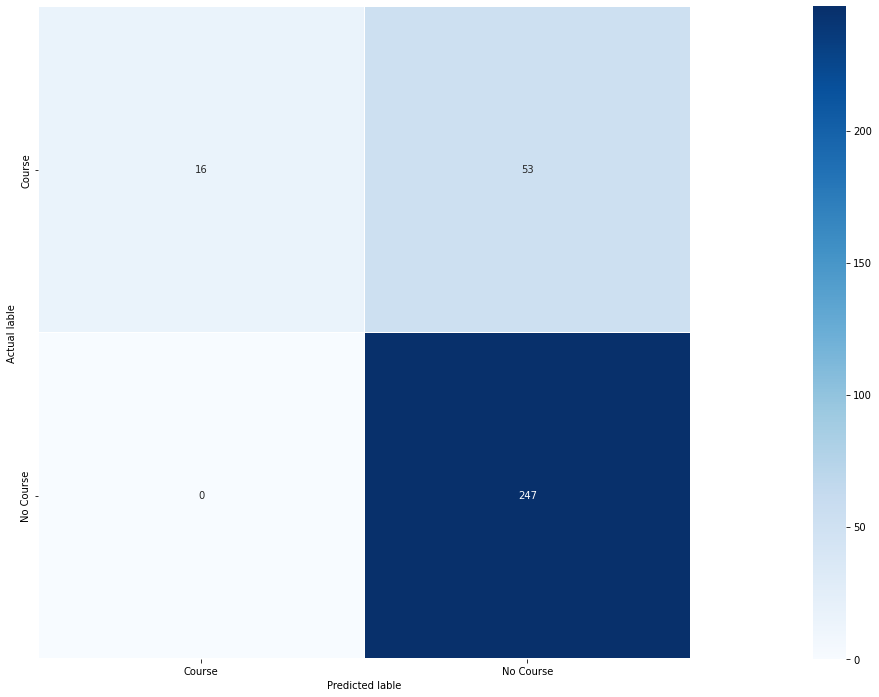

In [197]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

print('Accuracy score with Multinomial Naive Bayes is : ')
print(metrics.accuracy_score(Y_test,Y_Pred)*100)
cf_matrix = confusion_matrix(Y_test, Y_Pred)
print(classification_report(Y_test, Y_Pred))

plt.figure(figsize=(44,12))

unique_label = ["Course" , "No Course"]

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label, yticklabels= unique_label  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

## **Saving Models**

In [ ]:
import pickle
pickle.dump(model, open('model.pickle', 'wb'))
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))